In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import YouTubeVideo
from IPython.display import IFrame

# Vídeo Aula 3 - O modelo linear 1

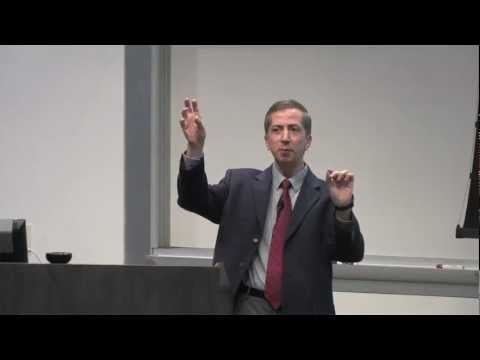

In [0]:
YouTubeVideo('FIbVs5GbBlQ',width=980, height=500)

# The Pocket Algorithm

In [0]:
class Pocket:
    
    def __init__(self):
        
        pass
    
    def fit(self,train_x,train_y,iters = 10):
        
        n_samples = train_x.shape[0] # quantidade de dados
        n_features = train_x.shape[1] # numero de variáveis, dimensão do problema
        train_x = np.concatenate((train_x,(np.ones((n_samples,1)))), axis=1) # adicionando uma dimensão ao problema
        pseudo_inverse_X = np.linalg.pinv(train_x)
        w = pseudo_inverse_X*np.matrix(train_y.reshape((-1,1))) # vetor peso inicial
        self.w = np.array(w).reshape(n_features+1)
        iters_n = 0
        converge = False
        errors = train_x.shape[0]
        self.pocket = self.w
        self.list_errors = []
        self.list_errors_in_pocket = []
        while not converge : #enquanto houver erros
            converge = True
            for i in range(train_x.shape[0]):
                if  np.sign(self.w @ train_x[i]) != train_y[i]:# iteração que houve erro
                    self.w = self.w + train_y[i]*train_x[i] # aplica o PLA
                    converge = False
                    predicts = np.sign(train_x @ self.w)
        
                    error_n = (predicts != train_y).sum()
                    self.list_errors.append(error_n)
                    if error_n < errors:
                        self.pocket = self.w
                        self.list_errors_in_pocket = [train_x.shape[0]]
            iters_n+=1
            if iters_n > iters:
                converge = True
        self.train_x = train_x
        self.train_y = train_y
        return print(' weight in a Pocket : ',self.pocket,', iters = ',iters)
    
    def predict(self,X):
        
        X = np.concatenate((X,(np.ones((X.shape[0],1)))),axis=1)
        return np.sign(X @ self.w)
        
        

# Importando os dados utilizados pelo Yasser, dísponíveis no site do curso

In [0]:
intensidade_simetria = np.loadtxt('datasets/Digitos_yasser/intensidade_simetria.txt')

In [0]:
imagens = np.loadtxt('datasets/Digitos_yasser/escala_cinza.txt')

In [0]:
## Função que mostra a imagem do digito, dado o vetor que o representa
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((16,16)), cmap=plt.cm.gray)
    plt.show()
    return

## função que exibe a imagem de um digito dado o dataset
def vis_image(index,train_x):
   
    show_digit(train_x[index,1:])
    print('label:' ,train_x[index,0])
    return


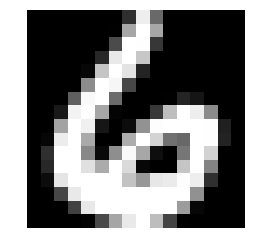

label: 6.0


In [0]:
vis_image(0,imagens)

# Plotando a intensidade x simetria para os digitos 1 e 5

In [0]:
data1 = intensidade_simetria[(intensidade_simetria[:,0]==1)]
data2 = intensidade_simetria[(intensidade_simetria[:,0]==5)]
train_x = np.concatenate((data1[:,1:],data2[:,1:]),axis = 0)
train_y = np.concatenate((data1[:,0],data2[:,0]),axis = 0)
def get_dum(x):
    if x == 5:
        return 1
    return -1
train_y = np.array(pd.Series(train_y).apply(get_dum) )    

Text(0,0.5,'Simetria')

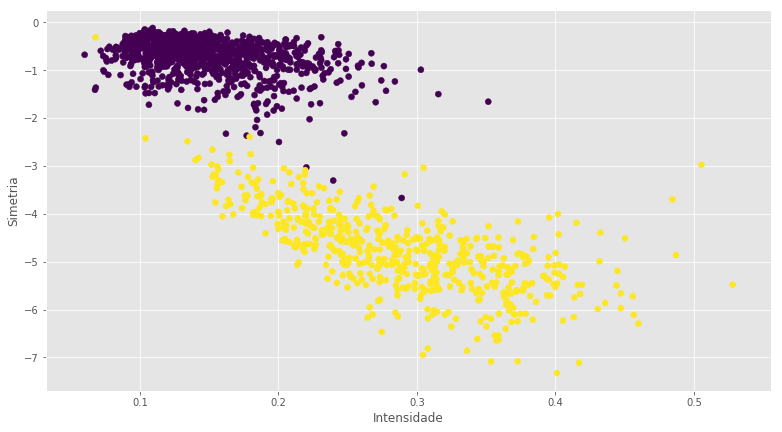

In [0]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.scatter(train_x[:,0],train_x[:,1],c = train_y)
plt.xlabel('Intensidade')
plt.ylabel('Simetria')

# Aplicando o Pocket a esse conjunto de dados

In [0]:
model_pocket500 = Pocket()
model_pocket500.fit(train_x,train_y,500)

 weight in a Pocket :  [ 22.78439537  -6.91203165 -11.11588016] , iters =  500


(0, 0.5)

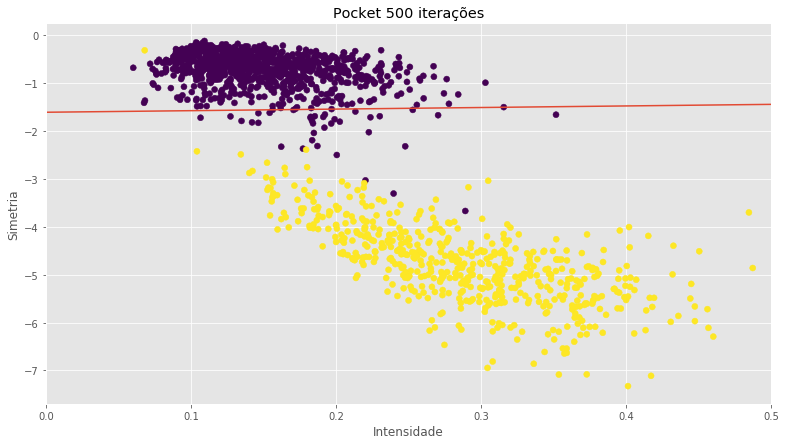

In [0]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.scatter(train_x[:,0],train_x[:,1],c = train_y)
x1 = np.arange(0,0.2,0.1)
plt.plot((-model_pocket500.pocket[0]*x1 - model_pocket500.pocket[2]) / model_pocket500.pocket[1])
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Pocket 500 iterações')
plt.xlim((0,0.5))

In [0]:
model_pocket1000 = Pocket()
model_pocket1000.fit(train_x,train_y,1000)

 weight in a Pocket :  [ 25.3068557   -5.07259415 -13.11588016] , iters =  1000


(0, 0.5)

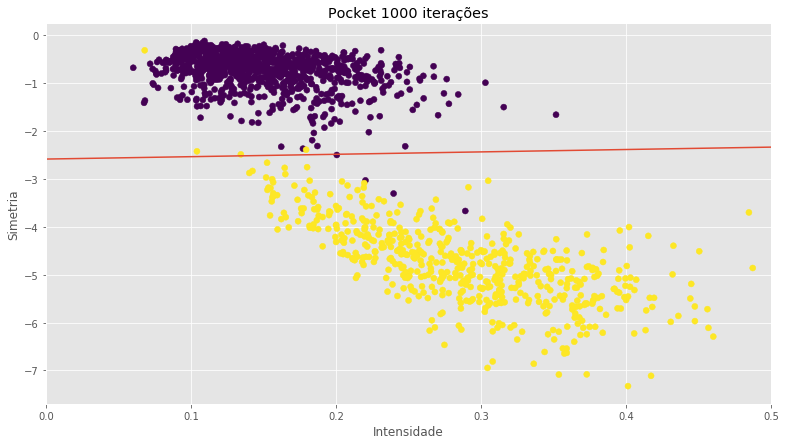

In [0]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.scatter(train_x[:,0],train_x[:,1],c = train_y)
x1 = np.arange(0,0.2,0.1)
plt.plot((-model_pocket1000.pocket[0]*x1 - model_pocket1000.pocket[2]) / model_pocket1000.pocket[1])
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Pocket 1000 iterações')
plt.xlim((0,0.5))

In [0]:
class linear_regression:
    
    def __init__(self):
        pass
    
    def fit(self,train_x,train_y):
        
        train_x = np.concatenate((train_x,(np.ones((train_x.shape[0],1)))), axis=1) # adicionando uma dimensão ao problema
        
        pseudo_inverse_X = np.linalg.pinv(train_x)
        self.w = pseudo_inverse_X*np.matrix(train_y.reshape((-1,1))) 
        self.w = np.array(self.w).reshape(-1)
        
        
        print('Weights:',self.w)
        
    def predict(self, test_y):
        
        y = self.w
        h = lambda x,y: np.dot(x,y)
        
        return np.array(np.apply_along_axis(h, 0, test_y))
    

In [0]:
linear_model = linear_regression()
linear_model.fit(train_x,train_y)

Weights: [-1.24859546 -0.49753165 -1.11588016]


(0, 0.5)

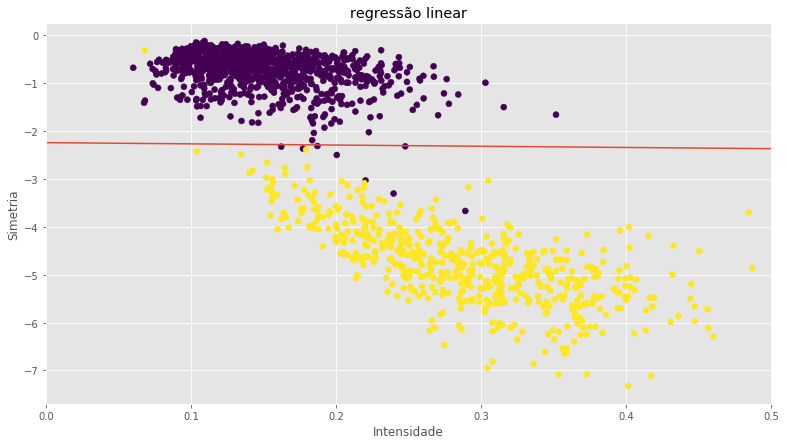

In [0]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.scatter(train_x[:,0],train_x[:,1],c = train_y)
x1 = np.arange(0,0.2,0.1)
plt.plot((-linear_model.w[0]*x1 - linear_model.w[2]) / linear_model.w[1])
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('regressão linear')
plt.xlim((0,0.5))

In [0]:
class perceptron_regression:
    def __init__(self):
        pass
  
    def fit(self,train_x,train_y):
        
        
        n_samples = train_x.shape[0] # quantidade de dados
        n_features = train_x.shape[1] # numero de variáveis, dimensão do problema
        train_x = np.concatenate((train_x,(np.ones((n_samples,1)))), axis=1) # adicionando uma dimensão ao problema
        pseudo_inverse_X = np.linalg.pinv(train_x)
        w = pseudo_inverse_X*np.matrix(train_y.reshape((-1,1))) # vetor peso inicial
        self.w = np.array(w).reshape(n_features+1)
        iters = 0
        converge = False
        while not converge : #enquanto houver erros
            converge = True
            for i in range(train_x.shape[0]):
                if  np.sign(self.w @ train_x[i]) != train_y[i]:# iteração que houve erro
                    self.w = self.w + train_y[i]*train_x[i] # aplica o PLA
                    converge = False
            iters+=1
        self.train_x = train_x
        self.train_y = train_y
        return print(' weight : ',self.w,', iters = ',iters)
    
    def predict(self,X):
        
        X = np.concatenate((X,(np.ones((X.shape[0],1)))),axis=1)
        return np.sign(X @ self.w)
    
    def plot_line(self):
        
        x1 = np.arange(0,90,10)
        x2 = (-self.w[0]*x1 - self.w[2]) / self.w[1]
        plt.plot(x1,x2)
        plt.ylim((0,90))
        
        
    def plot_decision_boundary(self):
        
        x_min, x_max = self.train_x[:,0].min() - .05, self.train_x[:,0].max() + .05
        y_min, y_max = self.train_x[:,1].min() - .05, self.train_x[:,0].max() + .05
        spacing_gap = 0.05
    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing_gap), np.arange(y_min, y_max, spacing_gap))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape) > 0.5
        
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
        plt.scatter(self.train_x[:,0], self.train_x[:,1], c = self.train_y, cmap=plt.cm.Spectral)

        plt.show()

    

# Aplicando o perceptron com W inicial obtido da regressão linear

In [0]:
data = pd.DataFrame([[30,70,'Doente'],[40,60,'Doente'],[50,10,'Doente'],[50,30,'Doente'],[50,50,'Doente'],[70,30,'Doente'],\
                     [30,10,'Não Doente'],[30,30,'Não Doente'],[20,40,'Não Doente'],[10,30,'Não Doente'],[20,60,'Não Doente']],\
                    columns = ['exame_1','exame_2','Estado de Saude'])

In [0]:
train_x = np.array(data[['exame_1','exame_2']])
def get_trainy(x):
    if x == 'Doente':
        return -1
    return 1

train_y = np.array(data['Estado de Saude'].apply(get_trainy))
model = perceptron_regression()
model.fit(train_x,train_y)

 weight :  [-0.05126365 -0.01925117  2.50826833] , iters =  1


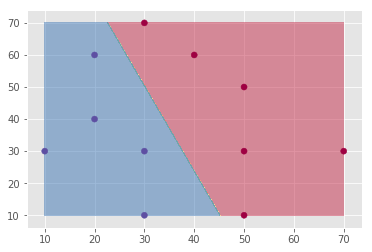

In [0]:
model.plot_decision_boundary()

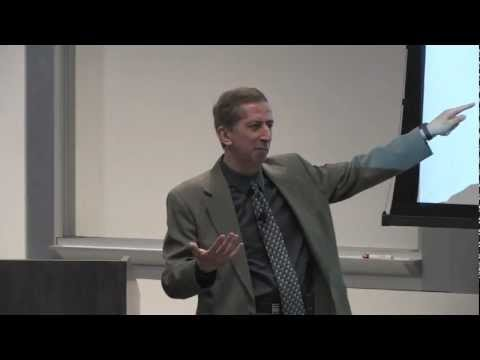

In [0]:
YouTubeVideo('L_0efNkdGMc',height = 500 ,width = 980)

In [0]:
IFrame(src = 'https://work.caltech.edu/homework/hw2.pdf', width=1000, height=800)

In [0]:
IFrame(src ='https://work.caltech.edu/homework/hw2_sol.pdf',height=800, width = 1000)